In [24]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R013", "R014", "R015"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [26]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-08-30 15:21:28,325][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 18 sessions for R013 between 2023-08-12 and 2023-08-30
fetched 18 sessions for R014 between 2023-08-12 and 2023-08-30
fetched 18 sessions for R015 between 2023-08-12 and 2023-08-30


In [27]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R015_2023-08-30_day_summary
['adj_pre', 's_a', 'delay', 'post']


In [28]:
trials_df.query("date == @today").groupby(["animal_id", "date"]).give_type_imp.unique()

animal_id  date      
R013       2023-08-30              [light, none]
R014       2023-08-30    [water_and_light, none]
R015       2023-08-30    [water_and_light, none]
Name: give_type_imp, dtype: object

In [29]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [30]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R01s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-08-10 -> 2023-08-30
Returning appended df with entries between 2023-08-10 and 2023-08-30
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R01s_days_df.csv


In [31]:
trials_df.query("date == @today").groupby("animal_id").stimulus_dur.describe()

,count,mean,std,min,25%,50%,75%,max
animal_id,,,,,,,,
R013,131.0,0.4,1.114485e-16,0.4,0.4,0.4,0.4,0.4
R014,124.0,0.4,0.000000e+00,0.4,0.4,0.4,0.4,0.4
R015,122.0,0.4,0.000000e+00,0.4,0.4,0.4,0.4,0.4


In [32]:
trials_df.query("date == @today").groupby("animal_id").volume_multiplier.mean()

animal_id
R013    0.85
R014    0.85
R015    0.85
Name: volume_multiplier, dtype: float64

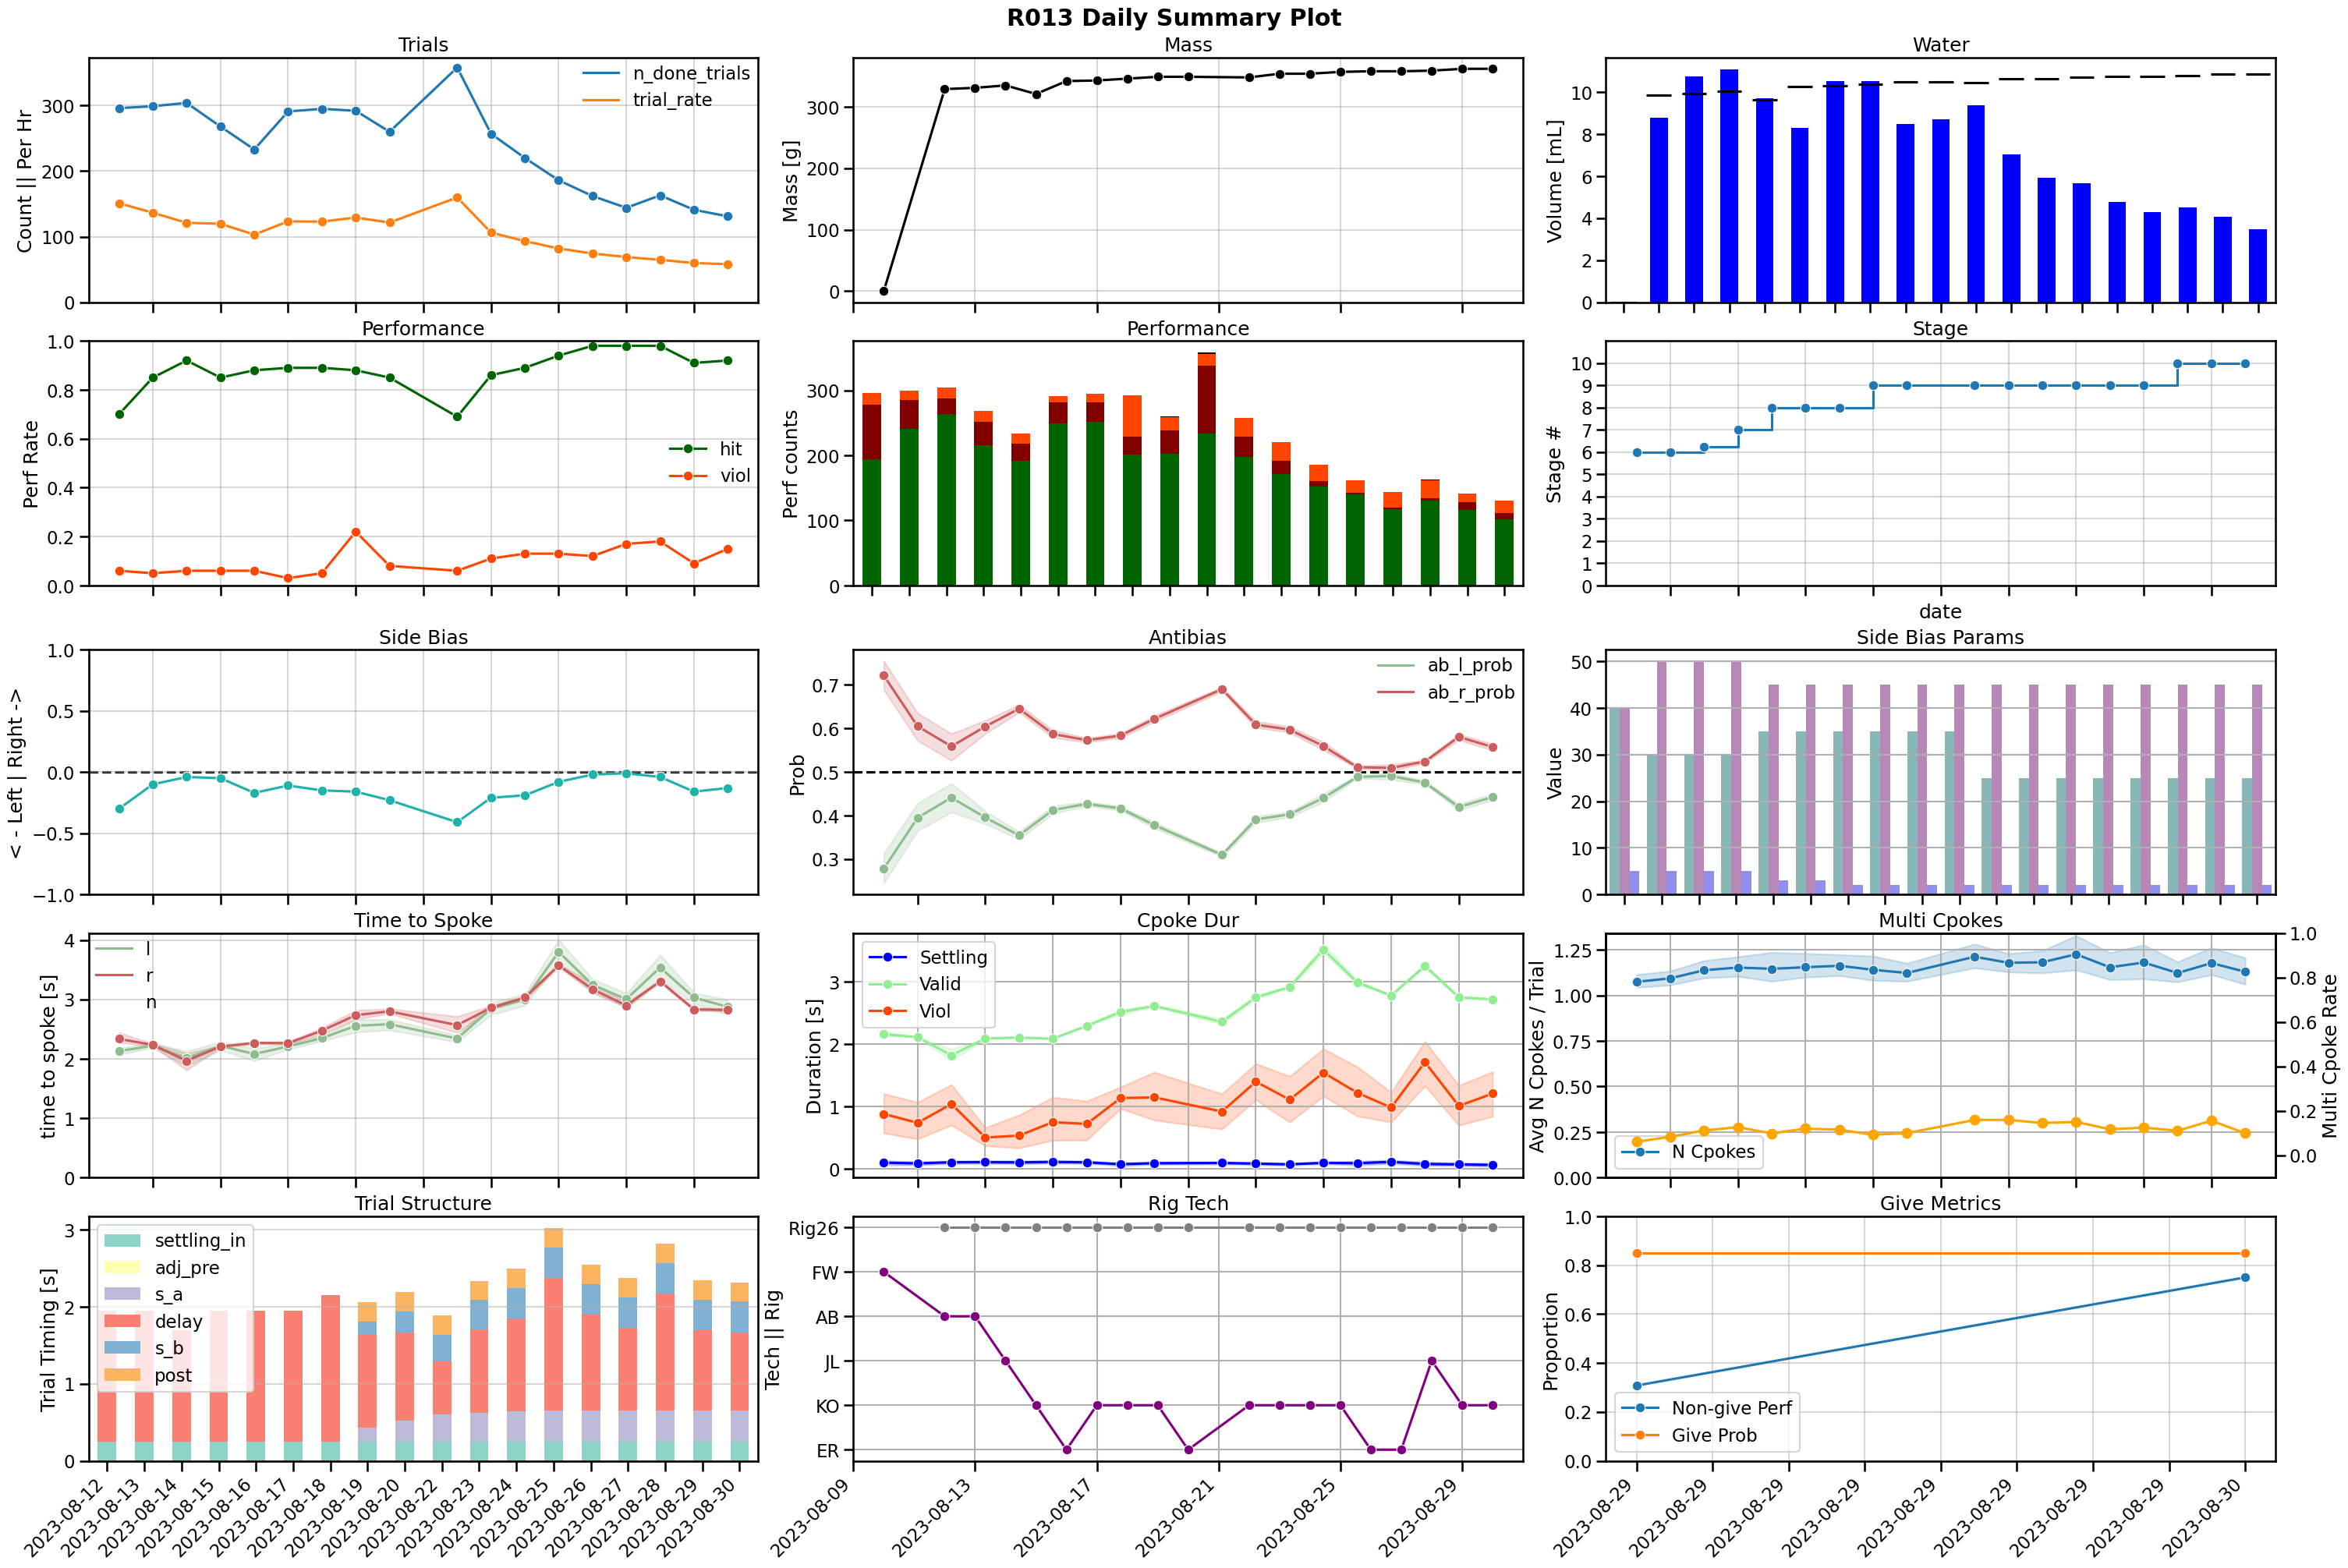

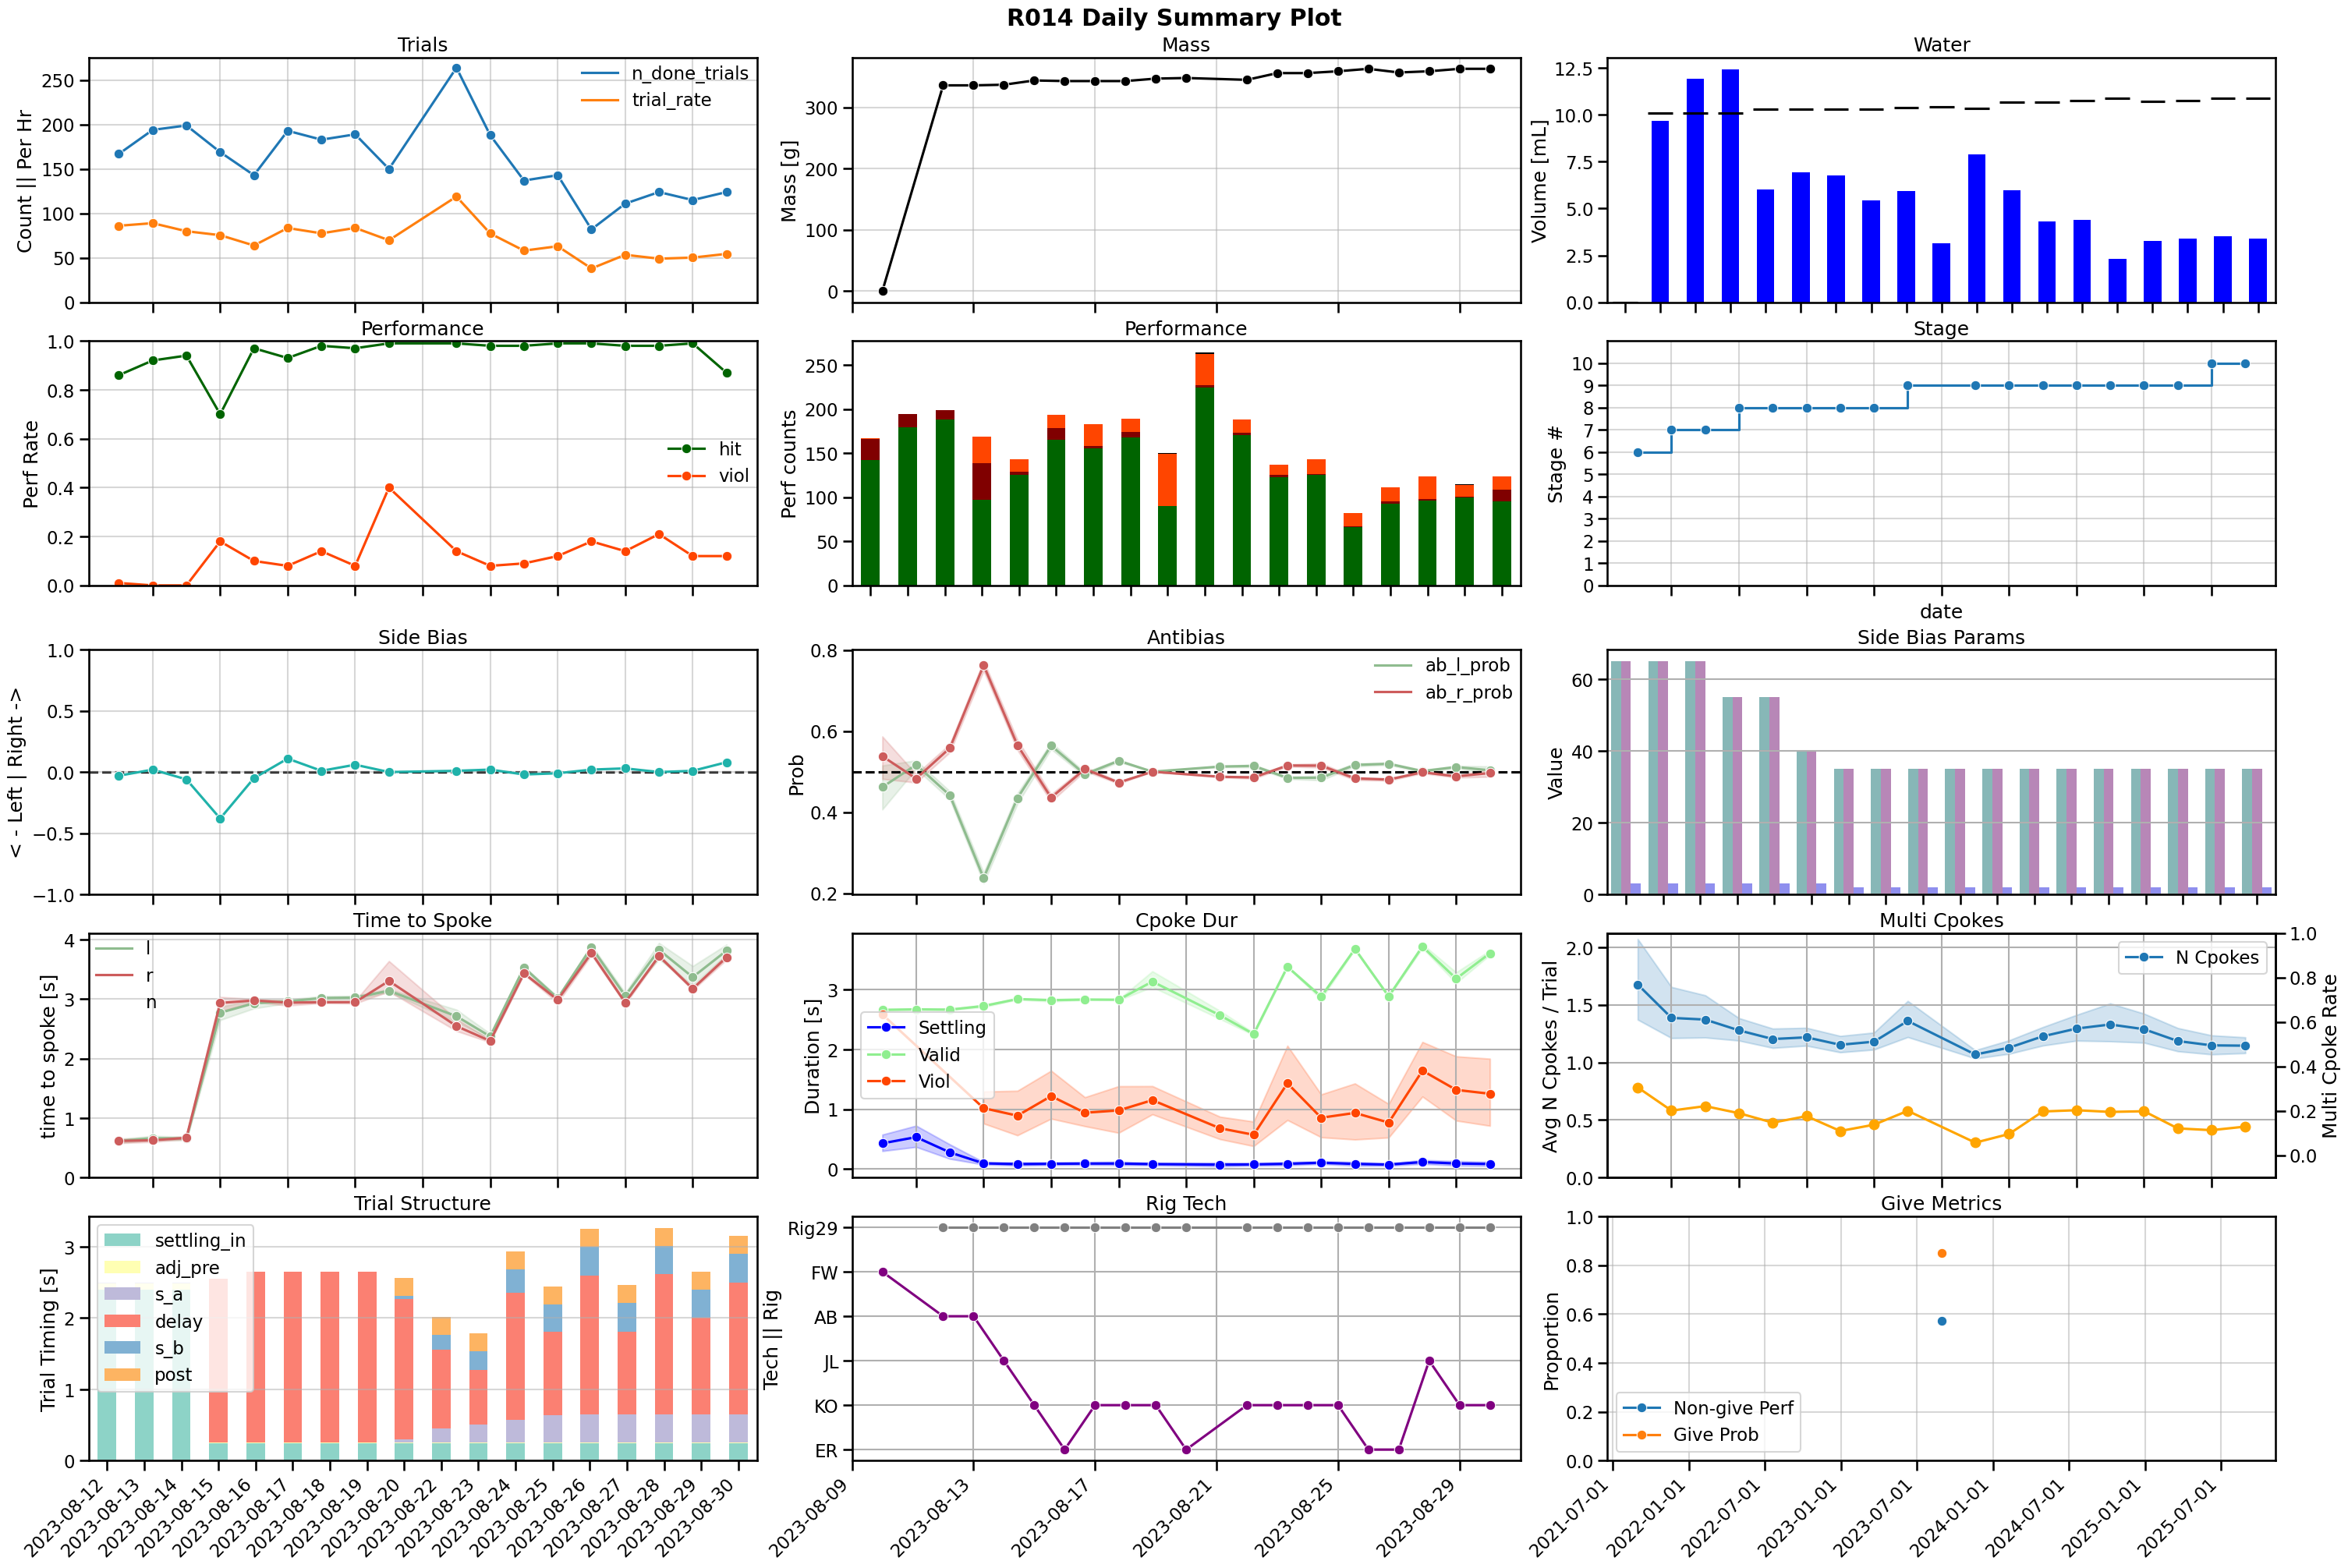

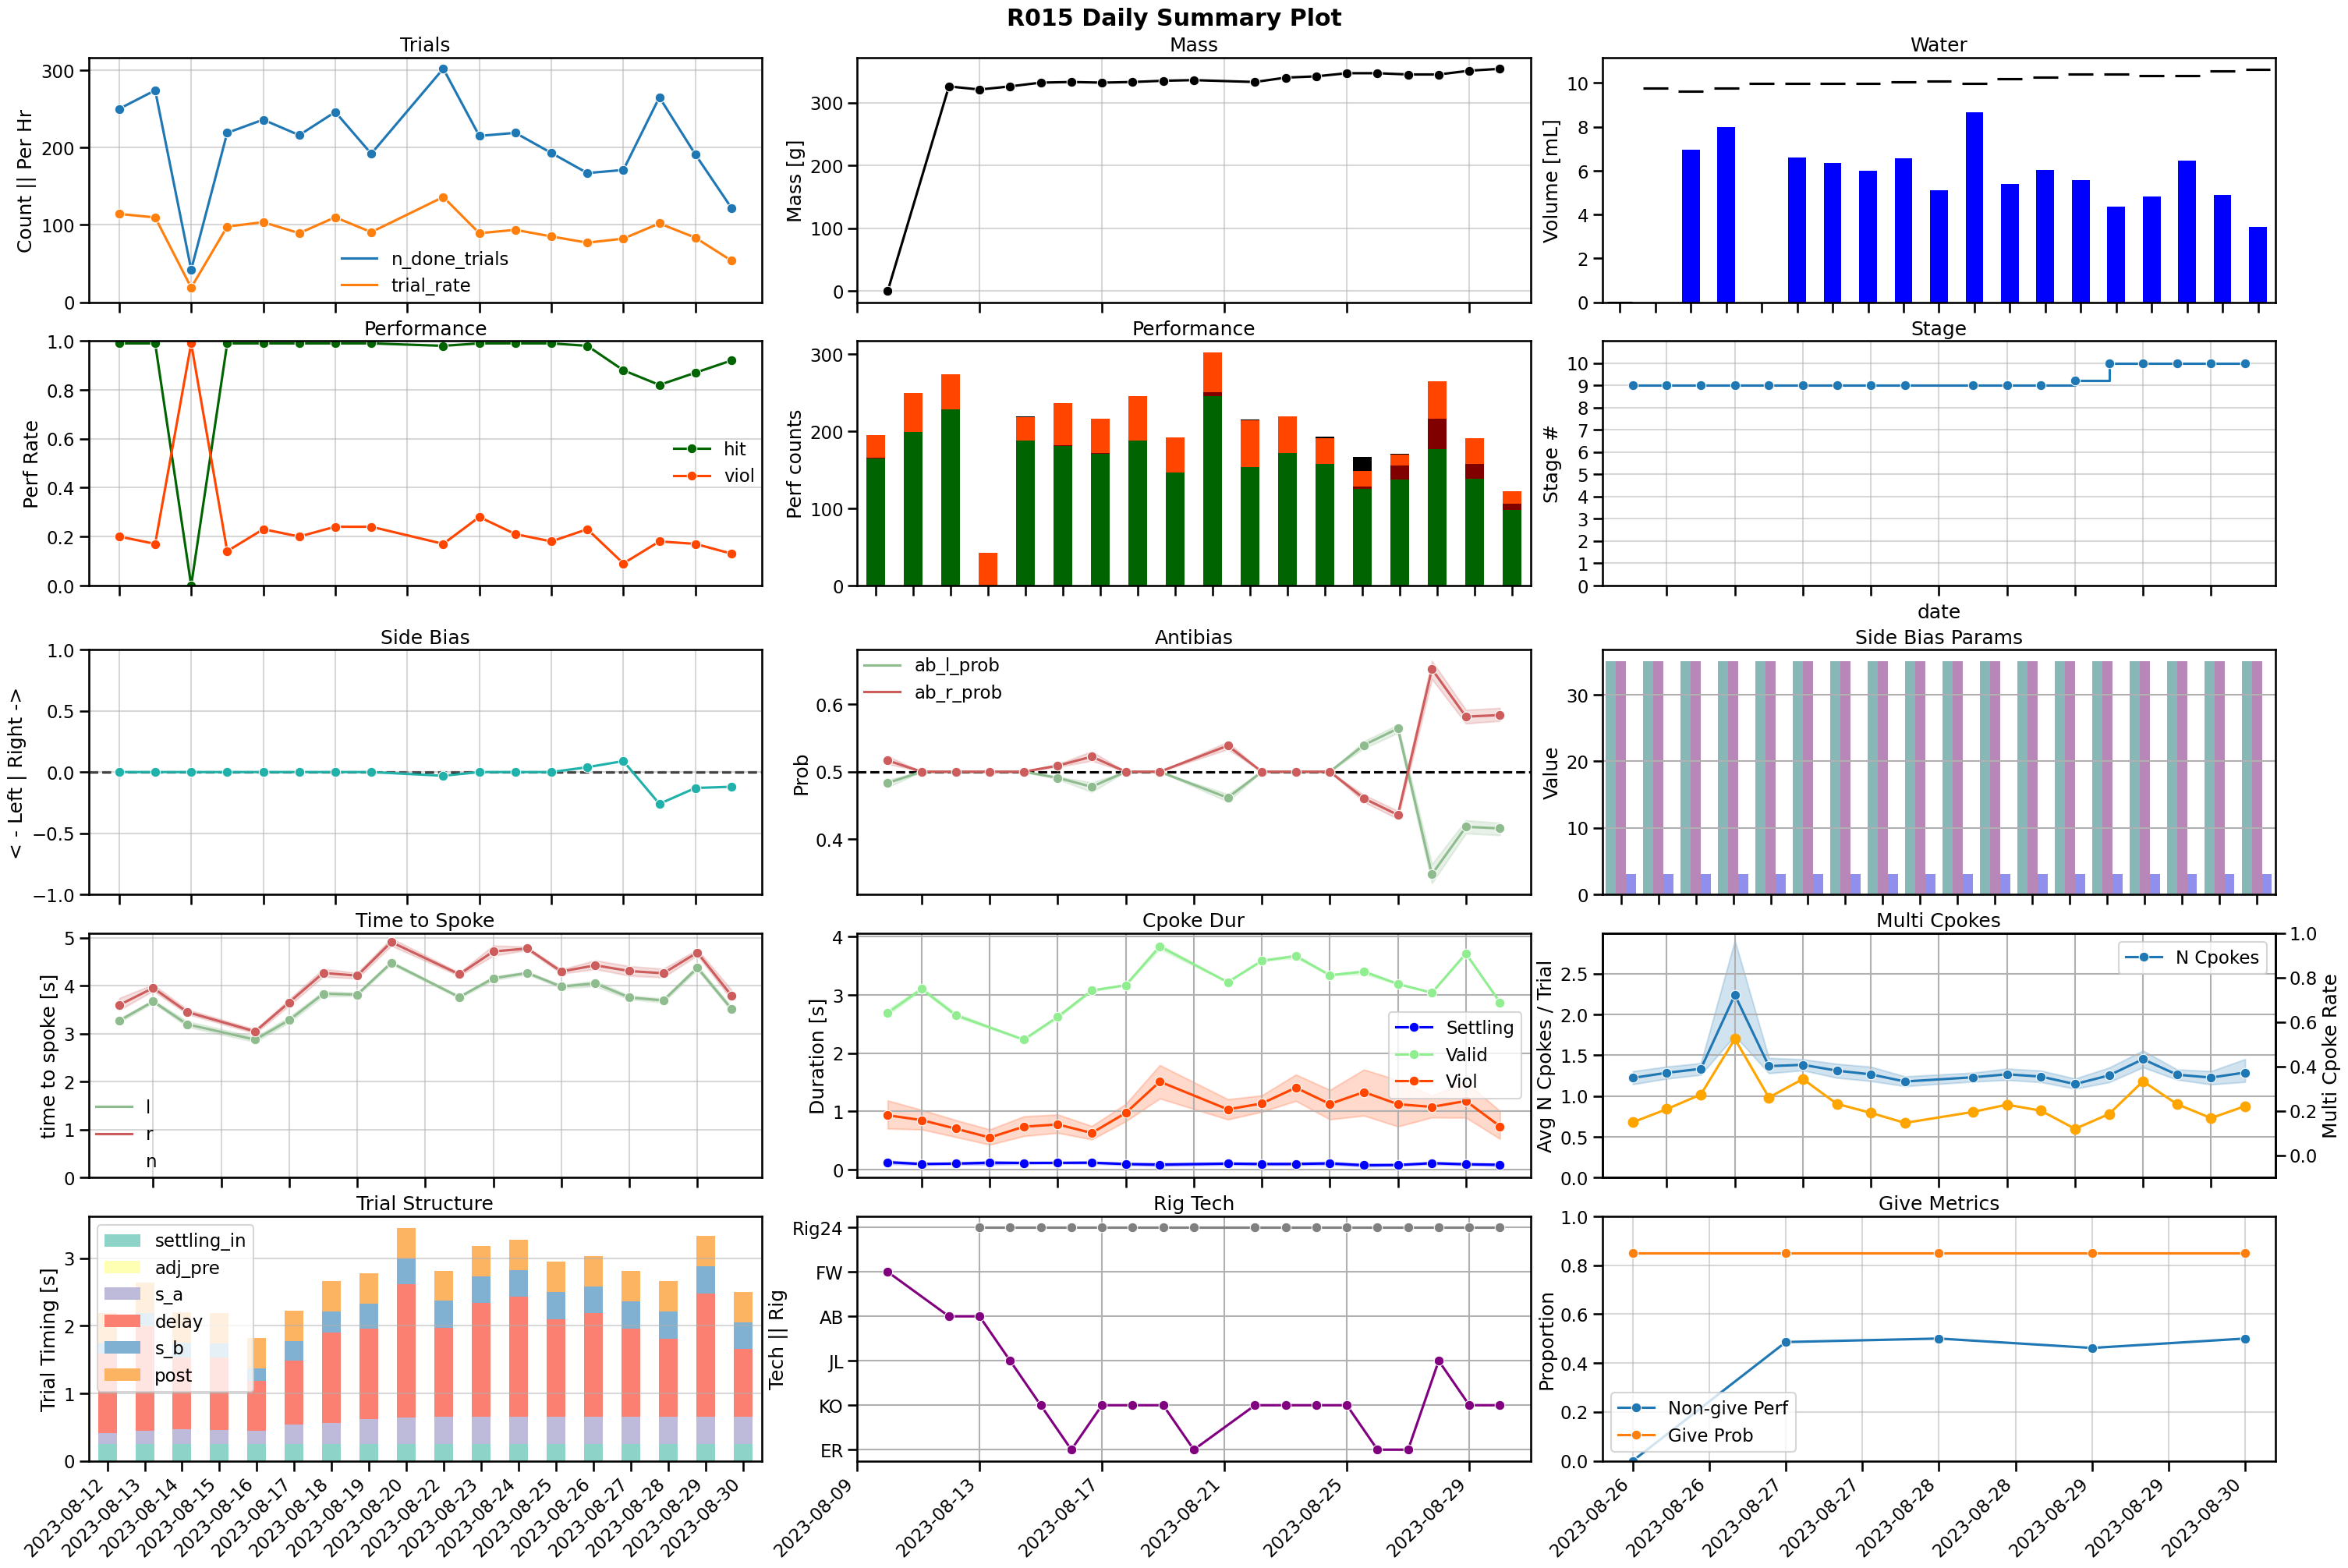

In [50]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)